In [ ]:

import pandas as pd
import os
from scipy.stats import skew, kurtosis


In [ ]:
dataset_path = "/content/Bank-Customer-Attrition-Insights-Data.csv"
df = pd.read_csv(dataset_path)

print("Dataset Preview:\n", df.head())


key_columns = ['Balance', 'CreditScore', 'TransactionCount']  # Update if needed

# Check if columns exist in the dataset
available_columns = [col for col in key_columns if col in df.columns]

if available_columns:
    # Compute summary statistics
    summary_stats = df[available_columns].agg(
        ['mean', 'median', 'std'] # Removed skew and kurtosis here
    )

    # Calculate skewness and kurtosis separately
    skewness = df[available_columns].apply(skew).to_frame().T # Calculate and transpose
    kurtosis_values = df[available_columns].apply(kurtosis).to_frame().T # Calculate and transpose

    # Rename index for better readability for skewness and kurtosis
    skewness.index = ['Skewness']
    kurtosis_values.index = ['Kurtosis']

    # Concatenate all summary statistics
    summary_stats = pd.concat([summary_stats, skewness, kurtosis_values])


    # Rename index for better readability for the main summary stats
    summary_stats.index = ['Mean', 'Median', 'Standard Deviation', 'Skewness', 'Kurtosis']
    # Print the summary statistics
    print("\nSummary Statistics:\n", summary_stats)
else:
    print("\nError: Some specified columns not found in dataset. Check column names using df.columns.")

Dataset Preview:
    RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15598695    Fields          619    France  Female   42   
1          2    15649354  Johnston          608     Spain  Female   41   
2          3    15737556  Vasilyev          502    France  Female   42   
3          4    15671610    Hooper          699    France  Female   39   
4          5    15625092   Colombo          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   


Gender Distribution:
 Gender
Male      5457
Female    4543
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64


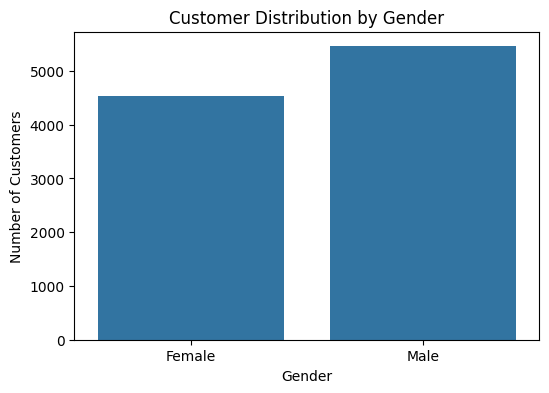

In [ ]:
gender_counts = df['Gender'].value_counts()
print("Gender Distribution:\n", gender_counts)

print(df['Gender'].value_counts())
print(df['Geography'].value_counts())
print(df['Age'].describe())  # Summarizing age distribution


plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Customer Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()


Geography Distribution:
 Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


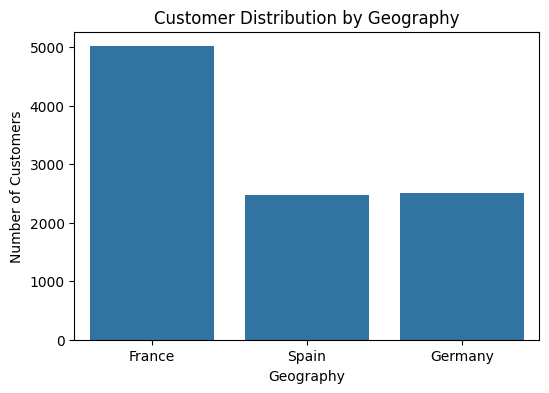

In [ ]:
geography_counts = df['Geography'].value_counts()
print("\nGeography Distribution:\n", geography_counts)

plt.figure(figsize=(6, 4))
sns.countplot(x='Geography', data=df)
plt.title('Customer Distribution by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.show()

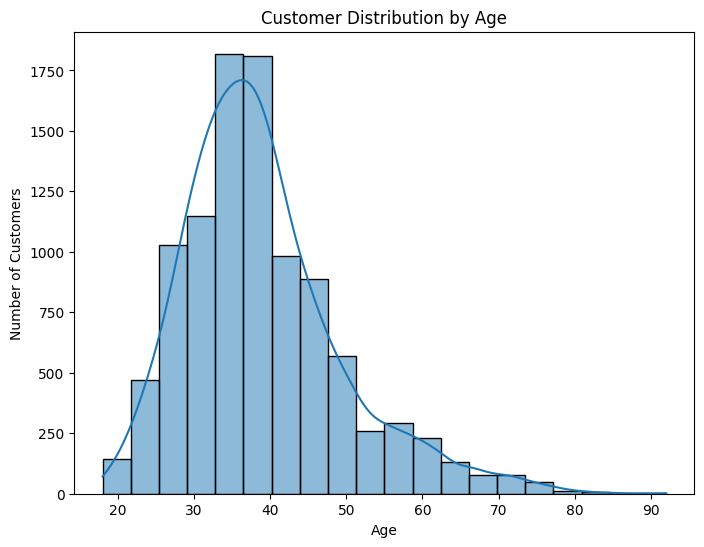

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)  # Histogram with KDE
plt.title('Customer Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

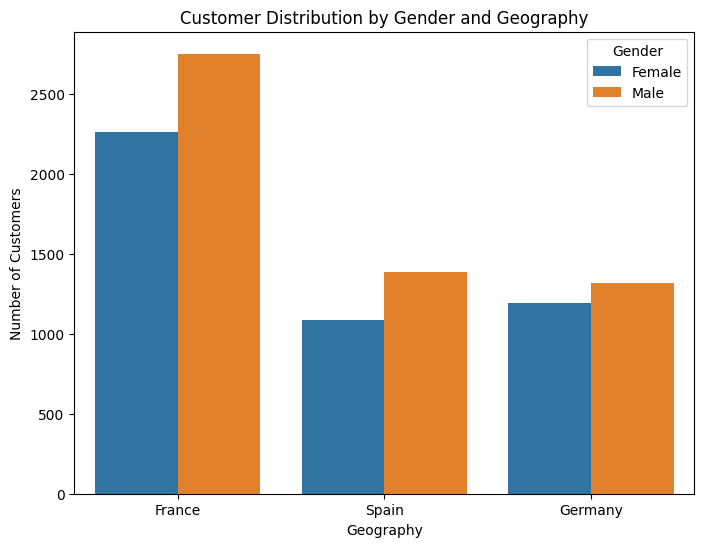

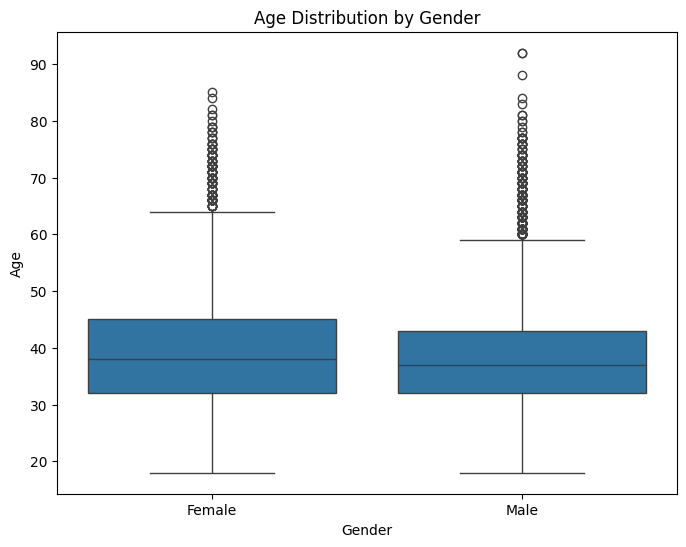

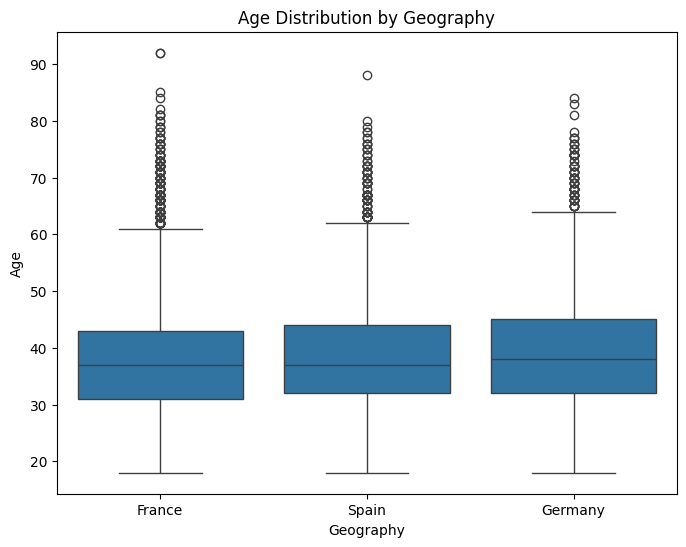

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Gender', data=df)
plt.title('Customer Distribution by Gender and Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Geography', y='Age', data=df)
plt.title('Age Distribution by Geography')
plt.xlabel('Geography')
plt.ylabel('Age')
plt.show()

In [ ]:
print(df.columns)


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')


In [ ]:
balance_stats = df.groupby('IsActiveMember')['Balance'].agg(['min', 'max', 'mean'])
balance_stats.index = ['Inactive Customers (IsActiveMember=0)', 'Active Customers (IsActiveMember=1)']

print("\nBalance Statistics for Active vs. Inactive Customers:\n", balance_stats)



Balance Statistics for Active vs. Inactive Customers:
                                        min        max          mean
Inactive Customers (IsActiveMember=0)  0.0  222267.63  77134.376863
Active Customers (IsActiveMember=1)    0.0  250898.09  75875.422145


In [ ]:
# Group by 'IsActiveMember' and compute statistics for 'NumOfProducts'
products_stats = df.groupby('IsActiveMember')['NumOfProducts'].agg(['min', 'max', 'mean'])

# Rename index for better readability
products_stats.index = ['Inactive Customers (IsActiveMember=0)', 'Active Customers (IsActiveMember=1)']

print("\nNumber of Products Statistics for Active vs. Inactive Customers:\n", products_stats)



Number of Products Statistics for Active vs. Inactive Customers:
                                        min  max      mean
Inactive Customers (IsActiveMember=0)    1    4  1.524438
Active Customers (IsActiveMember=1)      1    4  1.535624


<ipython-input-55-34a4b024fa4f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Balance', data=df, palette='coolwarm', ax=axes[0])
<ipython-input-55-34a4b024fa4f>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Stayed', 'Churned'])
<ipython-input-55-34a4b024fa4f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='NumOfProducts', data=df, palette='coolwarm', ax=axes[1])
<ipython-input-55-34a4b024fa4f>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xtickl

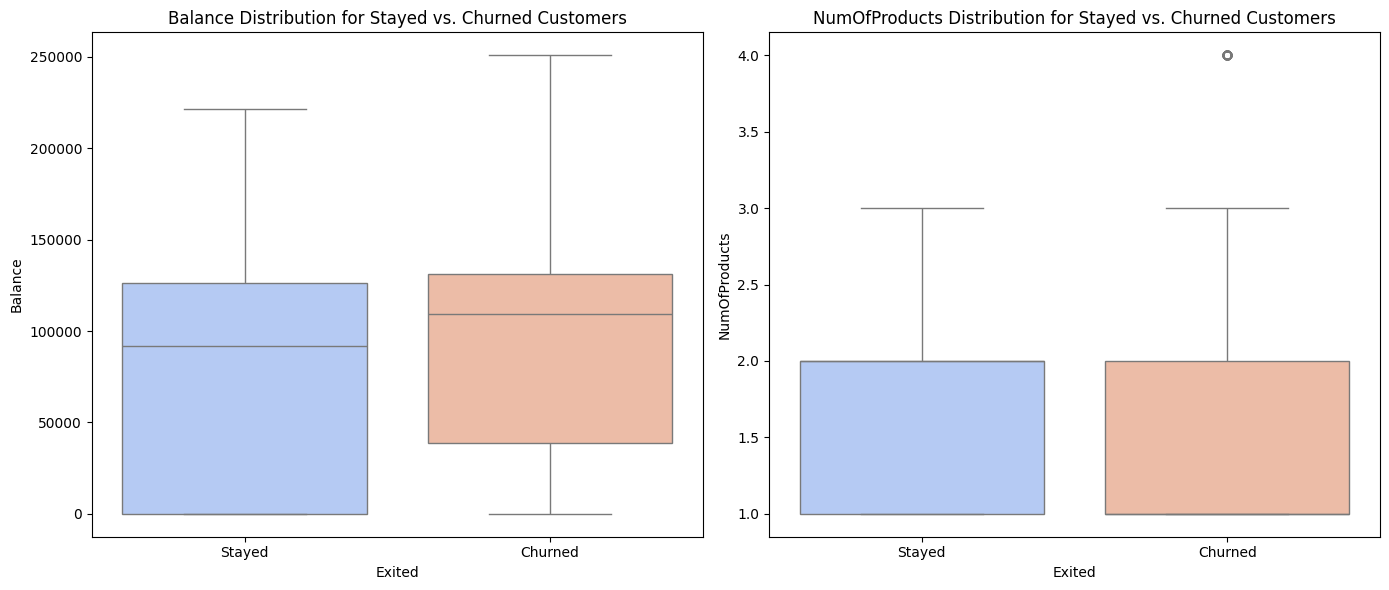

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


# Plot for Balance
sns.boxplot(x='Exited', y='Balance', data=df, palette='coolwarm', ax=axes[0])
axes[0].set_title('Balance Distribution for Stayed vs. Churned Customers')
axes[0].set_xticklabels(['Stayed', 'Churned'])
axes[0].set_ylabel('Balance')

# Plot for NumOfProducts
sns.boxplot(x='Exited', y='NumOfProducts', data=df, palette='coolwarm', ax=axes[1])
axes[1].set_title('NumOfProducts Distribution for Stayed vs. Churned Customers')
axes[1].set_xticklabels(['Stayed', 'Churned'])
axes[1].set_ylabel('NumOfProducts')

# Display the plots
plt.tight_layout()
plt.show()


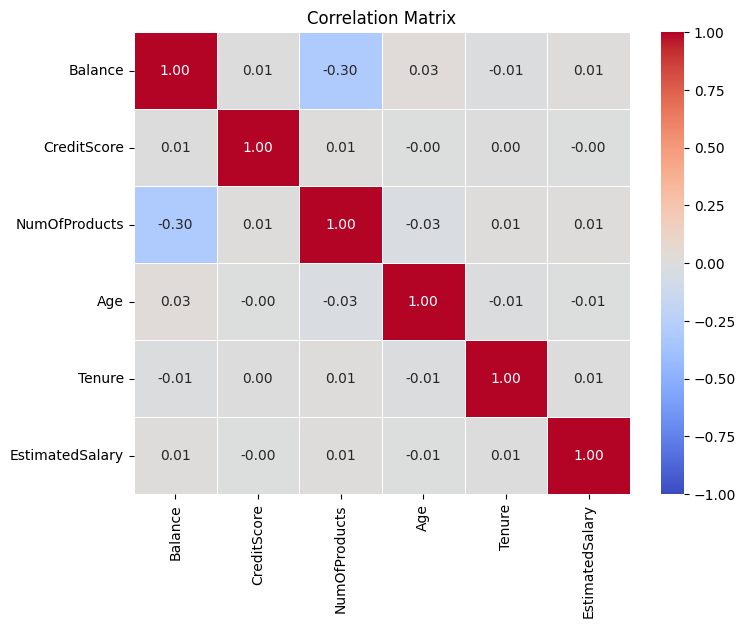

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df[['Balance', 'CreditScore', 'NumOfProducts', 'Age', 'Tenure', 'EstimatedSalary']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


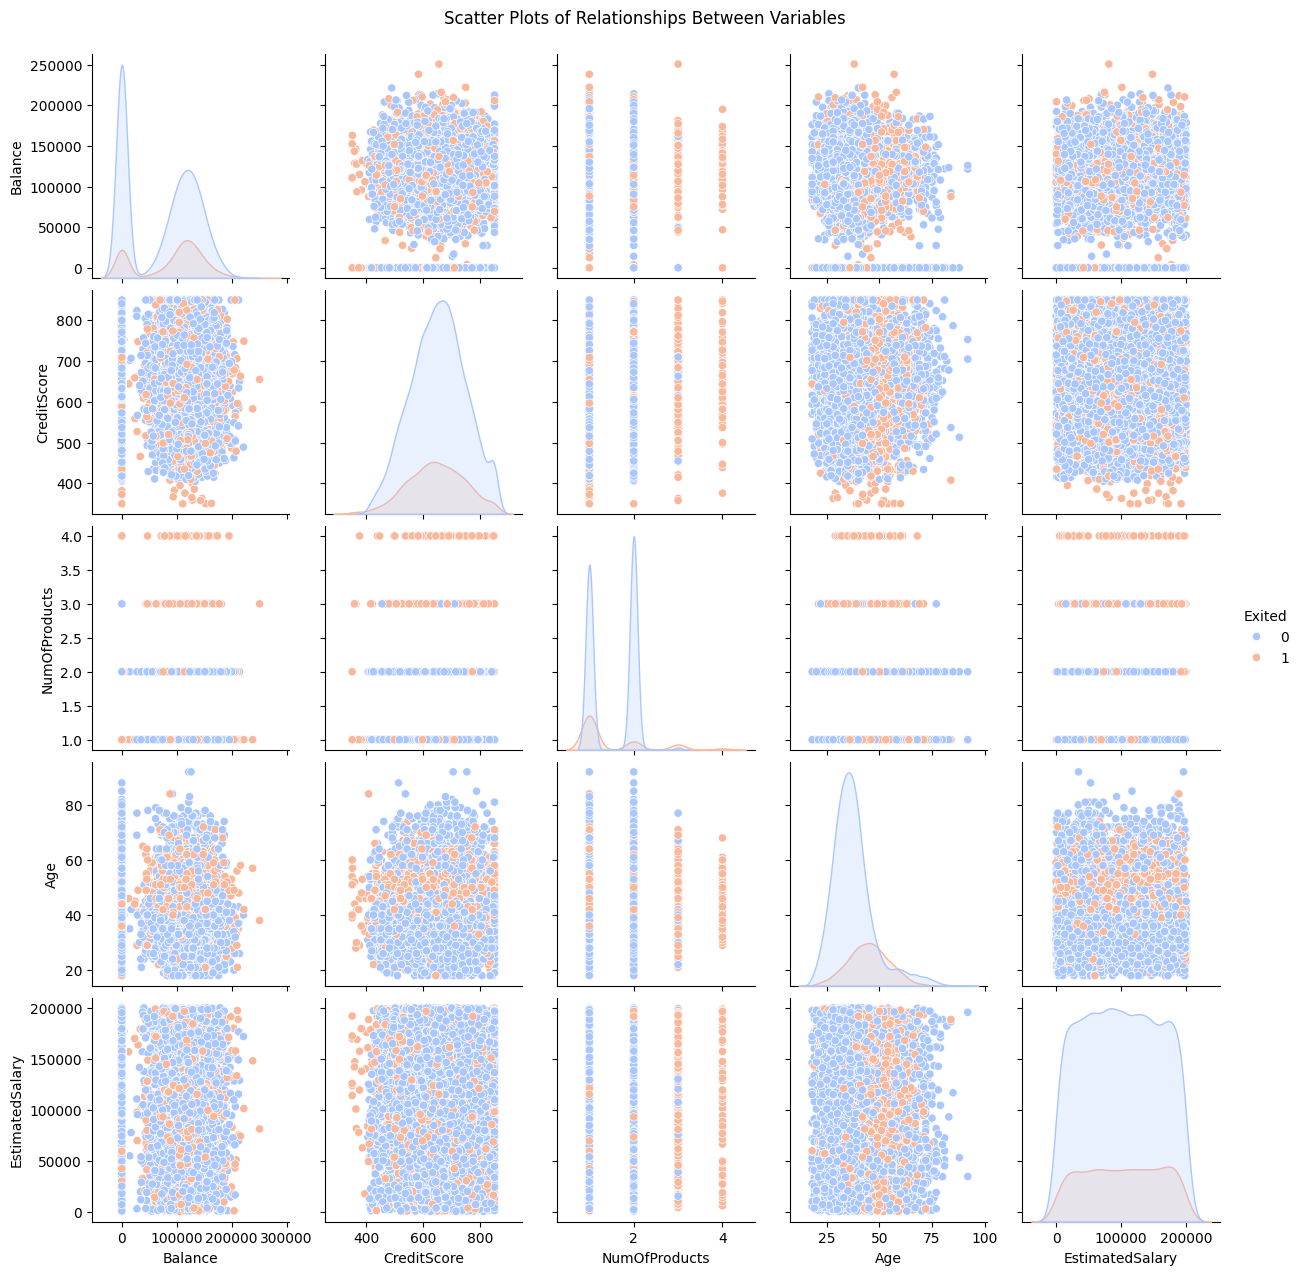

In [ ]:
# Set up a pair of scatter plots for relationship analysis
sns.pairplot(df[['Balance', 'CreditScore', 'NumOfProducts', 'Age', 'EstimatedSalary', 'Exited']], hue='Exited', palette='coolwarm') # Include 'Exited' in the columns list
plt.suptitle('Scatter Plots of Relationships Between Variables', y=1.02)
plt.show()

In [ ]:
# Step 1: Define thresholds based on median values
credit_score_median = df['CreditScore'].median()
balance_median = df['Balance'].median()

# Step 2: Filter customers with low credit score and high balance
low_credit_high_balance = df[(df['CreditScore'] < credit_score_median) & (df['Balance'] > balance_median)]

# Step 3: Calculate the probability
probability = len(low_credit_high_balance) / len(df)

# Output the probability
print(f"The probability that a customer has both a low credit score and a high balance is: {probability:.4f}")


The probability that a customer has both a low credit score and a high balance is: 0.2478
